<a href="https://colab.research.google.com/github/jamesBaker361/colab/blob/master/fule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q seaborn

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [4]:
path_pressure=keras.utils.get_file("airfoil_self_noise.dat","https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat")
path_pressure

65536/59984 [================================] - 0s 1us/step


'/root/.keras/datasets/airfoil_self_noise.dat'

In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
column_names = ['Freq','Angle','Chord','Velocity','Suction',
                'Pressure']
press_raw_dataset = pd.read_csv(path_pressure, names=column_names,
                      na_values = "?",
                      sep="\t", skipinitialspace=True)

press_dataset = press_raw_dataset.copy()
press_dataset.head()

,Freq,Angle,Chord,Velocity,Suction,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [9]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
press_dataset.isna().sum()

Freq        0
Angle       0
Chord       0
Velocity    0
Suction     0
Pressure    0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
press_dataset=press_dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [14]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


now we're going to make angle into a categorical variable like how we did with country of origin; separated into Acute <10, and obtuse >10

In [16]:
angle=press_dataset.pop('Angle')
angle.head()

KeyError: ignored

In [17]:
angle.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Angle, dtype: float64

In [0]:
press_dataset["Acute"]=(angle<10)*1.0
press_dataset["Obtuse"]=(angle>10)*1.0

In [19]:
press_dataset.head()

,Freq,Chord,Velocity,Suction,Pressure,Acute,Obtuse
0,800,0.3048,71.3,0.002663,126.201,1.0,0.0
1,1000,0.3048,71.3,0.002663,125.201,1.0,0.0
2,1250,0.3048,71.3,0.002663,125.951,1.0,0.0
3,1600,0.3048,71.3,0.002663,127.591,1.0,0.0
4,2000,0.3048,71.3,0.002663,127.461,1.0,0.0


In [20]:
press_dataset.tail()

,Freq,Chord,Velocity,Suction,Pressure,Acute,Obtuse
1498,2500,0.1016,39.6,0.052849,110.264,0.0,1.0
1499,3150,0.1016,39.6,0.052849,109.254,0.0,1.0
1500,4000,0.1016,39.6,0.052849,106.604,0.0,1.0
1501,5000,0.1016,39.6,0.052849,106.224,0.0,1.0
1502,6300,0.1016,39.6,0.052849,104.204,0.0,1.0


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
press_train_dataset=press_dataset.sample(frac=.75)
press_test_dataset=press_dataset.drop(press_train_dataset.index)

In [29]:
press_test_dataset.tail()

,Freq,Chord,Velocity,Suction,Pressure,Acute,Obtuse
1473,200,0.1016,71.3,0.043726,130.898,0.0,1.0
1478,630,0.1016,71.3,0.043726,122.288,0.0,1.0
1482,1600,0.1016,71.3,0.043726,121.528,0.0,1.0
1487,200,0.1016,39.6,0.052849,123.514,0.0,1.0
1492,630,0.1016,39.6,0.052849,118.084,0.0,1.0


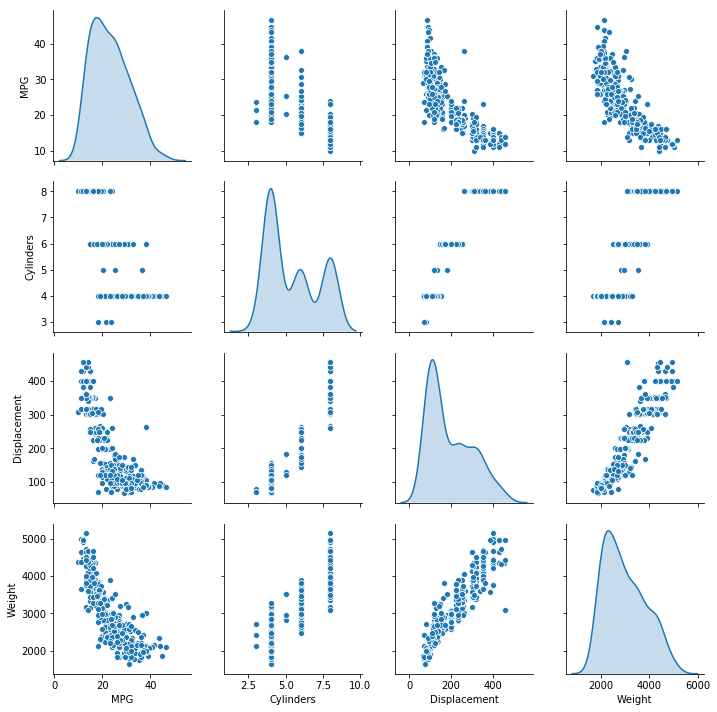

In [30]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

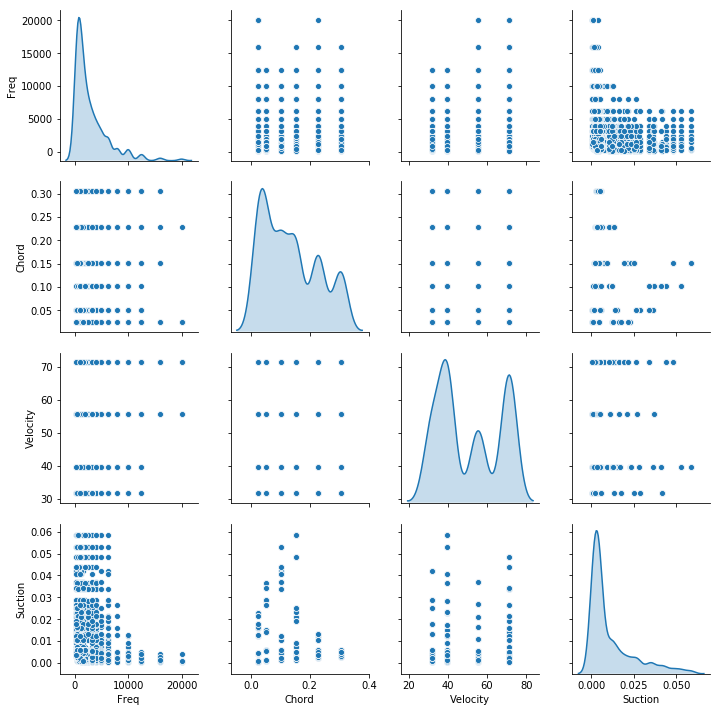

In [31]:
sns.pairplot(press_train_dataset[["Freq", "Chord", "Velocity", "Suction"]], diag_kind="kde")
plt.show()

In [32]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [33]:
press_train_stats=press_train_dataset.describe()
press_train_stats.pop("Pressure")
press_train_stats=press_train_stats.transpose()
press_train_stats

,count,mean,std,min,25%,50%,75%,max
Freq,1127.0,2916.685892,3173.893025,200.000000,800.000000,1600.000000,4000.000000,20000.000000
Chord,1127.0,0.135429,0.093610,0.025400,0.050800,0.101600,0.228600,0.304800
Velocity,1127.0,51.131766,15.615258,31.700000,39.600000,39.600000,71.300000,71.300000
Suction,1127.0,0.011294,0.013283,0.000401,0.002535,0.004957,0.016104,0.058411
Acute,1127.0,0.748891,0.433844,0.000000,0.000000,1.000000,1.000000,1.000000
Obtuse,1127.0,0.251109,0.433844,0.000000,0.000000,0.000000,1.000000,1.000000


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
press_train_labels = press_train_dataset.pop('Pressure')
press_test_labels = press_test_dataset.pop('Pressure')

In [36]:
press_test_labels.head()

0     126.201
3     127.591
7     123.061
9     119.541
12    112.241
Name: Pressure, dtype: float64

In [0]:
def norm(x,train_stats=train_stats):
  return (x - train_stats['mean']) / train_stats['std']

In [0]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [39]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852


In [0]:
press_normed_train_data=norm(press_train_dataset,press_train_stats)
press_normed_test_data=norm(press_test_dataset,press_train_stats)

In [45]:
press_normed_train_data.head()

,Freq,Chord,Velocity,Suction,Acute,Obtuse
178,-0.720467,1.809320,-0.738493,-0.413851,0.578801,-0.578801
569,-0.792933,0.181293,-0.738493,-0.485074,0.578801,-0.578801
463,1.065982,0.181293,1.291572,-0.729857,0.578801,-0.578801
1143,0.656391,-1.175396,-0.738493,0.130368,-1.726177,1.726177
1367,-0.288821,-0.361382,-0.738493,-0.415025,0.578801,-0.578801


**making the actual model, data is ready :)**


In [0]:
def build_model(td=train_dataset):
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(td.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model=build_model()

In [0]:
press_model=build_model(press_train_dataset)

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [52]:
press_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [53]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.0589593 ],
       [ 0.07563886],
       [-0.65298176],
       [ 0.04557204],
       [-0.5092305 ],
       [-0.06463034],
       [-0.51772165],
       [-0.03525171],
       [-0.07853803],
       [-0.5197004 ]], dtype=float32)

In [54]:
example_batch = press_normed_train_data[:10]
example_result = press_model.predict(example_batch)
example_result

array([[-0.25592136],
       [-0.1911406 ],
       [-0.40002626],
       [-0.17679653],
       [-0.13263397],
       [ 0.19265133],
       [ 0.00162831],
       [ 0.10764166],
       [-0.13188177],
       [ 0.10013038]], dtype=float32)

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

In [56]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [57]:
press_history = press_model.fit(
  press_normed_train_data, press_train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.406277,1.037300,2.406277,8.812105,2.178634,8.812105,995
996,2.428444,1.008481,2.428444,7.940848,2.104709,7.940848,996
997,2.558589,1.013894,2.558589,8.269275,2.103431,8.269276,997
998,2.350174,0.977132,2.350174,8.150951,2.115402,8.150950,998
999,2.492621,1.009941,2.492621,8.231877,2.150023,8.231877,999


In [59]:
press_hist = pd.DataFrame(press_history.history)
press_hist['epoch'] = press_history.epoch
press_hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,5.539084,1.794703,5.539084,7.320039,1.931126,7.320039,995
996,5.819728,1.835489,5.819728,10.227952,2.412815,10.227952,996
997,5.872196,1.817319,5.872197,11.040952,2.759357,11.040951,997
998,5.538708,1.790154,5.538708,9.463365,2.325714,9.463366,998
999,5.551783,1.797103,5.551783,10.836186,2.540643,10.836186,999


In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

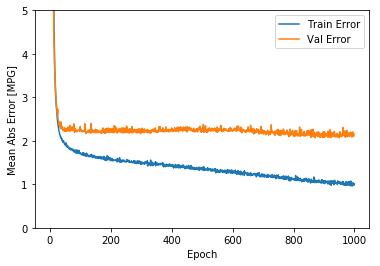

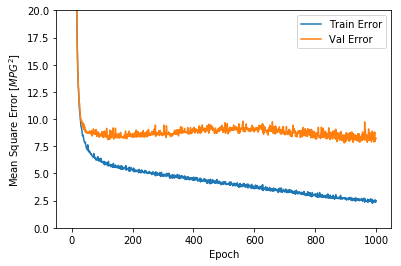

In [61]:
plot_history(history)

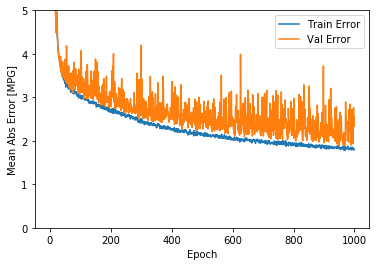

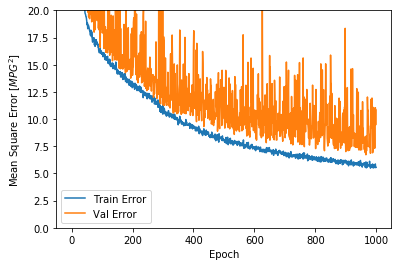

In [62]:
plot_history(press_history)


....................................................................................................
....

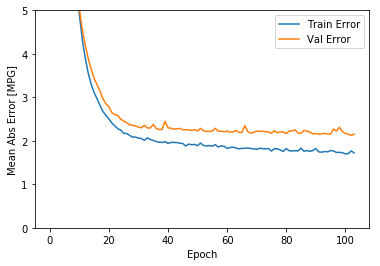

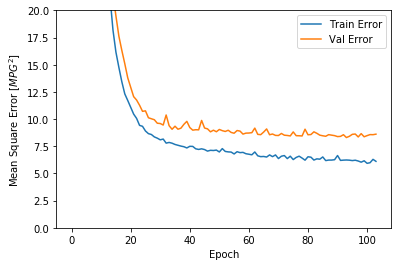

In [63]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


.................................................................

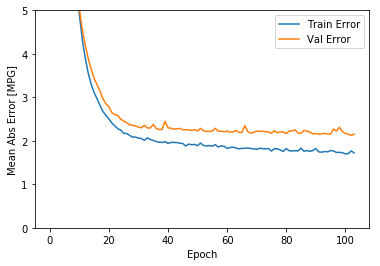

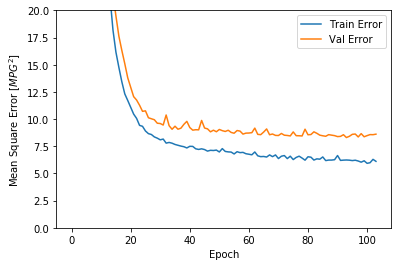

In [66]:
press_model = build_model(press_train_dataset)

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

press_history = press_model.fit(press_normed_train_data, press_train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [67]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.02 MPG


In [68]:
loss, mae, mse = press_model.evaluate(press_normed_test_data, press_test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Pressure".format(mae))

Testing set Mean Abs Error:  4.03 Pressure


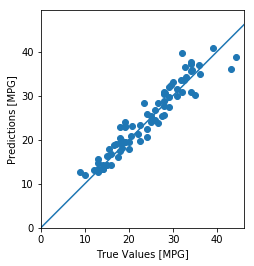

In [69]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

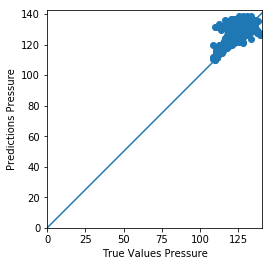

In [79]:
press_test_predictions = press_model.predict(press_normed_test_data).flatten()

plt.scatter(press_test_labels, press_test_predictions)
plt.xlabel('True Values Pressure')
plt.ylabel('Predictions Pressure')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

In [0]:
import numpy

In [0]:
test_labels=numpy.asarray(test_labels)

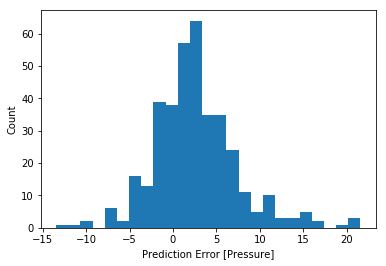

In [91]:
error = press_test_predictions - press_test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Pressure]")
_ = plt.ylabel("Count")